# Implementing FAST AI Concepts on 10 Monkey species dataset

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai.imports import *

In [3]:
from fastai.transforms import *
from fastai.models import *
from fastai.conv_learner import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.plots import *

In [4]:
PATH = "data/monkeys/"
sz = 64
bz = 50

In [5]:
torch.cuda.is_available()

True

In [6]:
torch.backends.cudnn.enabled

True

In [7]:
os.listdir(PATH)

['testSetCreator.py',
 'monkey_labels.txt',
 'valid',
 'models',
 'training.zip',
 'train',
 'tmp',
 'validation.zip']

In [8]:
os.listdir(f'{PATH}valid')

['n0', 'n2', 'n9', 'n6', 'n8', 'n4', 'n7', 'n5', 'n3', 'n1']

In [10]:
files = os.listdir(f'{PATH}valid/n0')[:5]
files

['n0014.jpg', 'n0013.jpg', 'n012.jpg', 'n017.jpg', 'n0017.jpg']

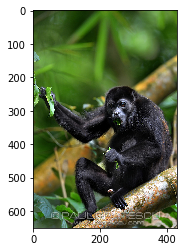

In [11]:
img = plt.imread(f'{PATH}valid/n0/{files[0]}')
plt.imshow(img)

In [13]:
img.shape

(650, 430, 3)

In [84]:
arch = resnet34
data = ImageClassifierData.from_paths(PATH, tfms= tfms_from_model(arch, sz))
learn = ConvLearner.pretrained(arch, data, precompute=True)


In [85]:
learn.lr_find()

HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                
    0      2.911912   527.159424 0.221875  



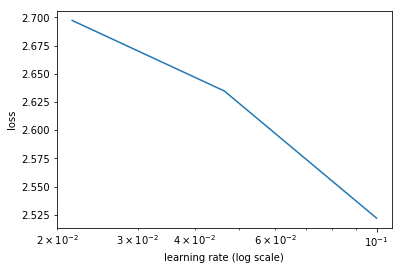

In [82]:
learn.sched.plot()

In [141]:
arch = resnet34
data = ImageClassifierData.from_paths(PATH, tfms= tfms_from_model(arch, sz))
learn = ConvLearner.pretrained(arch, data, precompute=True)
learn.fit(3e-2,2)

HBox(children=(IntProgress(value=0, description='Epoch', max=2), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                
    0      1.522349   0.658526   0.78125   
    1      1.030481   0.712872   0.80625                 



[0.7128724, 0.80625]

In [142]:
learn.precompute = False

In [143]:
learn.fit(3e-2,1,cycle_len=1)

HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                  
    0      0.478613   0.536358   0.809375  



[0.5363576, 0.809375]

## Other Approach

In [8]:
arch = resnet34
data = ImageClassifierData.from_paths(PATH, tfms= tfms_from_model(arch, sz, aug_tfms= transforms_side_on, max_zoom=1.1))
learn = ConvLearner.pretrained(arch, data, precompute=False)
learn.fit(2e-2,3 ,cycle_len=1)

HBox(children=(IntProgress(value=0, description='Epoch', max=3), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                 
    0      1.791205   1.245473   0.584375  
    1      1.300526   0.722545   0.7875                   
    2      1.051023   0.656602   0.8                      



[0.6566024, 0.8]

In [9]:
learn.unfreeze()

In [10]:
lr = np.array([2e-4,2e-3,2e-2])

In [150]:
learn.fit(lr, 3, cycle_len=1)

HBox(children=(IntProgress(value=0, description='Epoch', max=3), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                 
    0      1.516753   0.800981   0.71875   
    1      1.236876   0.766625   0.7375                   
    2      1.01824    0.707779   0.784375                 



[0.7077787, 0.784375]

In [151]:
learn.lr_find()

HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                  
    0      2.418963   nan        0.065625  



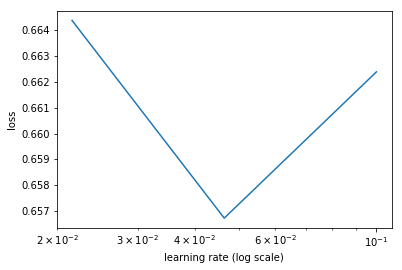

In [152]:
learn.sched.plot()

In [11]:
learn.fit(lr, 3, cycle_len=1, cycle_mult=2)

HBox(children=(IntProgress(value=0, description='Epoch', max=7), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                 
    0      1.525854   0.879406   0.6875    
    1      1.227633   0.752675   0.784375                 
    2      1.016136   0.716316   0.78125                  
    3      0.869248   0.612316   0.825                     
    4      0.733322   0.520315   0.84375                   
    5      0.62378    0.468309   0.85625                   
    6      0.566061   0.482466   0.85                      



[0.48246613, 0.85]